# NUMERICAL INTEGRATION

Computing integration of the function $e^{-x^2}$ using Trapezoidal rule, Simpson's 1/3 rule and Romberg's method

In [10]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np   

def f(x):
    return np.exp(-x**2)


#Function to compute Integration by both Trapezoidal and Simpson
def Intg(xi, xf, h):
    x = np.arange(xi, xf+h, h)#np.arange(x1,x2,h) omits the last point x2,so to include it,we add h
    n = len(x)
    y = f(x)
    Itrap = scipy.integrate.trapz(y, x)
    Isimp = scipy.integrate.simps(y, x, even = 'avg')
    return Itrap,Isimp         #Returns the Integrated value


In [11]:
#Romberg integration

# trapezoidal rule
def trapezoid(fx, a, b, N):
    h   = (b - a) / N
    xi  = np.linspace(a, b, N+1)
    fi  = f(xi)
    s   = 0.0
    for i in range(1, N):
        s = s + fi[i]
    s = (h / 2) * (fi[0] + fi[N]) + h * s
    return s

# romberg method
def romberg(a, b, nmax):
    Q = np.zeros((nmax, nmax), float)
    for i in range(0, nmax):
        N      = 2**i
        Q[i,0] = trapezoid(f, a, b, N)
        for k in range(0, i):
            n        = k + 2
            Q[i,k+1] = 1.0 / (4**(n - 1) - 1) * (4**(n - 1) * Q[i,k] - Q[i-1,k])  
    return Q[i,k+1]


In [12]:
#calculating value of the integral using the three methods

hi = 0.01
a  = -1.0
b  = 1.0
n  = 10

t,s = Intg(a, b, hi)
#n = int((b - a) / hi)
r = romberg(a, b, n)
print("The value of the integral obtained from Trapezoidal method is %f, from Simpson's method is %f and from Romberg method is %f." %(t,s,r))

The value of the integral obtained from Trapezoidal method is 1.493636, from Simpson's method is 1.493648 and from Romberg method is 1.493648.


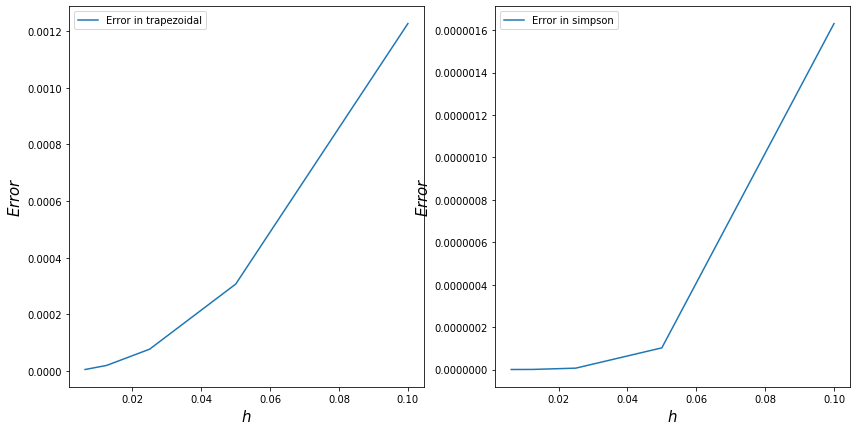

In [13]:
#Plotting the error from the trap and simp methods vs different values of h

a = -1.0
b =  1.0
h = [0.1,0.05,0.025,0.0125,0.00625]

Itr = np.zeros(5)  #5 is the length of h
Isi = np.zeros(5)

errtr = np.zeros(5)
errsi = np.zeros(5)

Itrue = 1.49364826564856

for i in range(len(h)): 
    itrap,isimp = Intg(-1, 1, h[i])
    Itr[i] = itrap
    errtr[i] = np.abs(Itrue - itrap)
    Isi[i] = isimp
    errsi[i] = np.abs(Itrue - isimp)
    
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.plot(h,errtr,label = 'Error in trapezoidal')
plt.xlabel('$h$',fontsize = 15)
plt.ylabel('$Error$',fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.plot(h,errsi,label = 'Error in simpson')
plt.xlabel('$h$',fontsize = 15)
plt.ylabel('$Error$',fontsize = 15)
plt.legend()
plt.show()

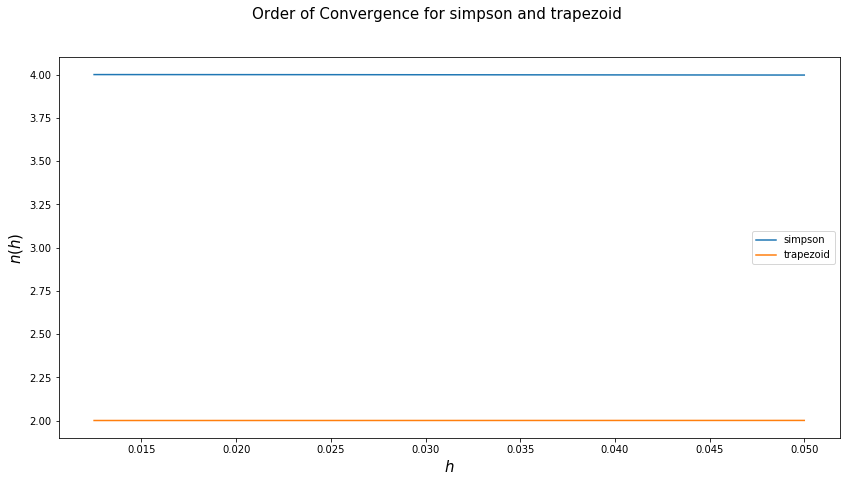

In [14]:
#order of convergence of trap and simp methods

n_simp = []   
n_trap = []
for i in range(3):
    n_simp.append(np.log2((Isi[i] - Isi[i+1]) / (Isi[i+1] - Isi[i+2])))
    n_trap.append(np.log2((Itr[i] - Itr[i+1]) / (Itr[i+1] - Itr[i+2])))

plt.figure(figsize = (14,7))
plt.plot(h[1:-1], n_simp, label = 'simpson') 
plt.plot(h[1:-1], n_trap, label = "trapezoid")    
plt.xlabel('$h$', fontsize = 15)
plt.ylabel('$n(h)$',fontsize = 15)
plt.suptitle('Order of Convergence for simpson and trapezoid',fontsize = 15)
plt.legend()
plt.show()

## Computing the energy loss due to GW emission from binary black holes using NR data

In [15]:
h  = np.loadtxt('/home/uddeepta/Desktop/ICTS/project_GW/computation/NRhData_SpEC_q1.00_spin1[0.00,-0.00,0.00]_spin2[0.00,0.00,0.00]_omega01.13e-02_l2_m2.dat')
t  = h[:,0]
hy = h[:,1]    
hx = h[:,2]
time    = np.array(t)
h_cross = np.array(hx)
h_plus  = np.array(hy)
dt = time[1] - time[0]

#using central difference method to calculate $dh_+/dt$ and $dh_x/dt$
def fc(arr,h):
    return ((arr[2:]-arr[:-2])/(2.0*h))

hc_dt = fc(h_cross,dt)
hp_dt = fc(h_plus,dt)

dE = (hc_dt**2) + (hp_dt**2)

E_trap = scipy.integrate.trapz(dE, x=time[1:-1])
E_simp = scipy.integrate.simps(dE, x=time[1:-1], even='avg')
print(E_trap, E_simp)


OSError: /home/uddeepta/Desktop/ICTS/project_GW/computation/NRhData_SpEC_q1.00_spin1[0.00,-0.00,0.00]_spin2[0.00,0.00,0.00]_omega01.13e-02_l2_m2.dat not found.

In [9]:
print(len(dE),len(x))

NameError: name 'dE' is not defined